<a href="https://colab.research.google.com/github/gesen2egee/MoE-LLaVA-hf/blob/main/MoE_LLaVA_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**moe模型DEMO (需登入github)**
https://replicate.com/camenduru/moe-llava


**WD14模型DEMO**
https://huggingface.co/spaces/SmilingWolf/wd-tagger


## **先[ ]執行上面區塊 再執行下面區塊**

In [ ]:
%cd /content
from google.colab import drive
drive.mount('/content/drive')

%cd /content
!git clone https://github.com/gesen2egee/MoE-LLaVA-hf

#在其他linux系統或runpod安裝mpi4py需要
#!apt-get update
#!apt-get install -y libopenmpi-dev openmpi-bin

%cd /content/MoE-LLaVA-hf
!pip install -e .
%cd /content/MoE-LLaVA-hf
!pip install deepspeed==0.12.6 gradio==3.50.2 decord==0.6.0 transformers==4.37.0 einops timm tiktoken accelerate mpi4py

%cd /content/MoE-LLaVA-hf
#!python app.py #測試moe用的GUI介面

將py後面 ' '內YOUR_DATASET'S_COLAB_PATH換成你的資料集路徑(左邊可以用目錄右鍵複製路徑，掛載google雲端在預設/content/drive/MyDrive下)

--moe 如果有會使用moe模型打標，如果沒有只用WD14打標 (自動刪特徵標)

--modify_prompt 使用wd14特徵修改moe的prompt

--caption_style 預設推薦 'mixed'=moe標+WD14標[分行]moe標*2[分行]觸發詞*2、'pure'=只打moe標、'rating'=用moe打sfw圖標、用WD14打nsfw圖標、'wildcards'=用分行wildcard形式打moe及WD14標，

(要在在kohya中使用多行wildcard要在引數加上 --enable_wildcard
不然預設只用第一行當caption)

--folder_name 將子資料夾_之後字串，放到打標之前當作觸發詞
--not_char folder_name不是角色 會用概念的方式打

--force 覆蓋原有txt，因為為了怕colab中斷，如果沒有force修改日期在七天內的txt不會被覆蓋

In [ ]:
%cd /content/MoE-LLaVA-hf
!python predict.py 'YOUR_DATASET'S_COLAB_PATH' --moe --force --caption_style='mixed' --folder_name --modify_prompt


使用方式

1.   將資料及colab位置填入，預設folder_name會將重複次數_後面的字串當作角色名觸發詞，如果不是訓練角色，可以在指令再加上--not_char會用目錄名當作概念觸發詞

2.   如果要在kohya中使用wildcard訓練，在Additional parameters中加上--enable_wildcard，會使用wildcard隨機選一行當作caption，不然預設只用第一行
3.   如果想對WD14標籤洗牌或tag dropout，在Additional parameters加上--keep_tokens_separator="|||"，會只針對WD14標籤處理

完成示意:

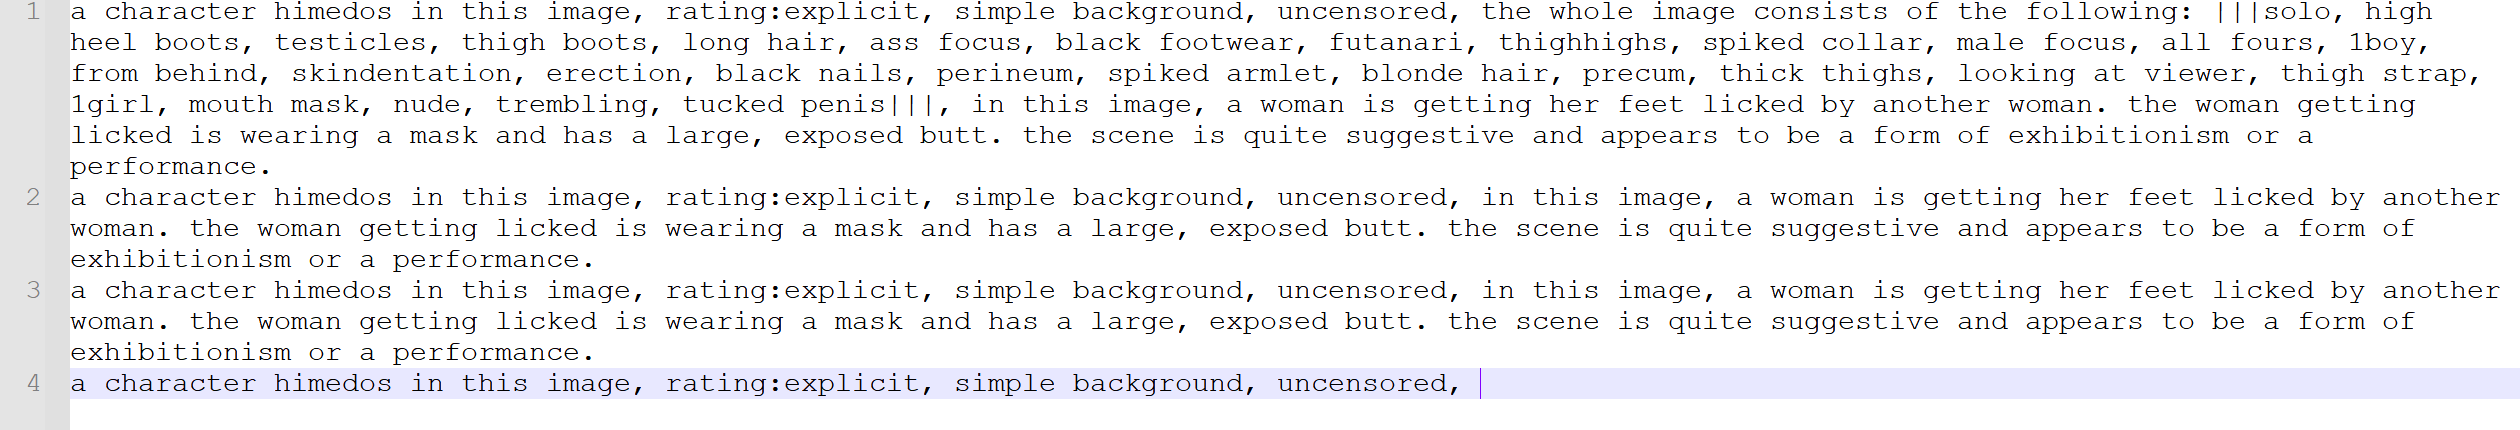


**本機安裝方式**

建議使用WSL或LINUX安裝

安裝方式可以參考

https://github.com/PKU-YuanGroup/MoE-LLaVA

https://github.com/camenduru/MoE-LLaVA-hf

跑圖可以找我修改的腳本

https://github.com/gesen2egee/MoE-LLaVA-hf/blob/main/predict.py

建議VRAM<16G改成 MOE_MODEL_PATH = 'LanguageBind/MoE-LLaVA-StableLM-1.6B-4e-384'


